In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def sinc_hanning(ntap,lblock):
    N=ntap*lblock
    w=np.arange(0,N)-N/2
    return np.hanning(ntap*lblock)*np.sinc(w/lblock)

def sinc(ntap,lblock):
    N=ntap*lblock
    w=np.arange(0,N)-N/2
    return np.sinc(w/lblock)

In [10]:
ntap=4
N=4096
nrows=10003
ndat=N*nrows
x=np.random.randn(nrows,N)

In [56]:
win=sinc_hanning(ntap,N)
winr=win.reshape(ntap,-1)
mat=np.zeros((nrows-ntap+1,N))
mat[:ntap,:]=winr

In [16]:
yreal=np.zeros((nrows-ntap+1,N),dtype='float64')
for i in range(nrows-ntap+1):
    yreal[i]=np.sum(x[i:i+ntap]*winr,axis=0)

In [40]:
yfake=yreal.copy() #has last three rows changed to actual convolution output

In [41]:
offset=3
nn=nrows-ntap+1
modval=nn
yfake[-3]=winr[0]*x[(nn-offset)%modval] + winr[1]*x[(nn-offset+1)%modval] + winr[2]*x[(nn-offset+2)%modval] + winr[3]*x[(nn-offset+3)%modval]
offset=2
yfake[-2]=winr[0]*x[(nn-offset)%modval] + winr[1]*x[(nn-offset+1)%modval] + winr[2]*x[(nn-offset+2)%modval] + winr[3]*x[(nn-offset+3)%modval]
offset=1
yfake[-1]=winr[0]*x[(nn-offset)%modval] + winr[1]*x[(nn-offset+1)%modval] + winr[2]*x[(nn-offset+2)%modval] + winr[3]*x[(nn-offset+3)%modval]

In [42]:
yfake[-3]

array([ 0.92081978,  1.74792205, -2.80400413, ...,  1.50973252,
        1.43210684,  0.12955072])

In [43]:
yreal[-3]

array([ 0.92081978,  1.74812536, -2.80364173, ...,  1.50973252,
        1.43210684,  0.12955072])

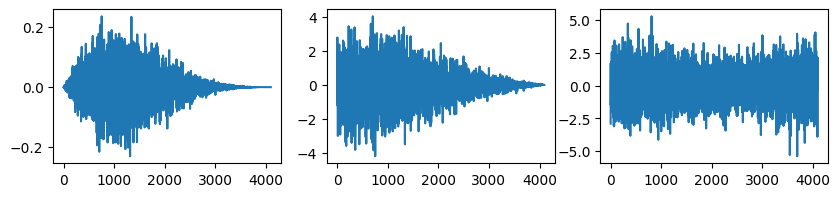

In [51]:
f=plt.gcf()
f.set_size_inches(10,2)
plt.subplot(131)
plt.plot(yfake[-3]-yreal[-3])
plt.subplot(132)
plt.plot(yfake[-2]-yreal[-2])
plt.subplot(133)
plt.plot(yfake[-1]-yreal[-1])

In [67]:
matft=np.fft.rfft(mat,axis=0)
yfakeft=np.fft.rfft(yfake,axis=0)
yrealft=np.fft.rfft(yreal,axis=0)

In [69]:
xre_fake = np.fft.irfft(yfakeft/matft,axis=0)
xre_real = np.fft.irfft(yrealft/matft,axis=0)

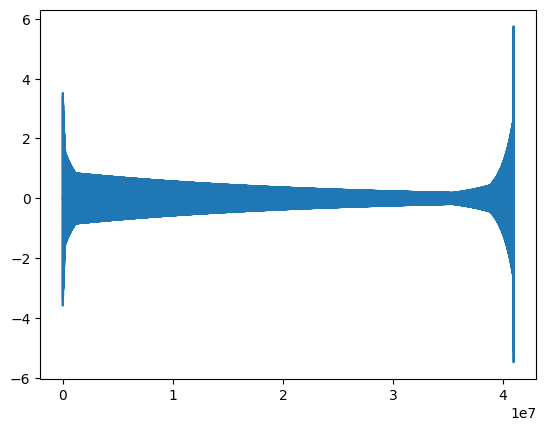

In [70]:
plt.plot(np.ravel(xre_fake)-np.ravel(xre_real))

In [72]:
np.xre_fake-x[:-3,:]

array([[ 0.19386927, -1.81046067, -1.26971722, ..., -1.74940128,
        -1.75145176, -0.97875198],
       [ 2.20073329, -2.37718446,  0.73203883, ...,  0.63256261,
         0.57204483, -0.61807327],
       [ 1.0838342 ,  1.02132661, -1.28839191, ...,  2.13683197,
        -1.30285479,  2.33319552],
       ...,
       [-2.53049876,  1.57625204, -0.93945081, ..., -3.61203746,
         3.18636127, -1.4634412 ],
       [-1.80888786, -0.65930157, -0.28449264, ..., -0.43682237,
         0.30637607,  0.11267262],
       [-1.17887794, -3.05564264,  0.69746406, ...,  3.15935007,
        -2.05426466,  1.97887453]])

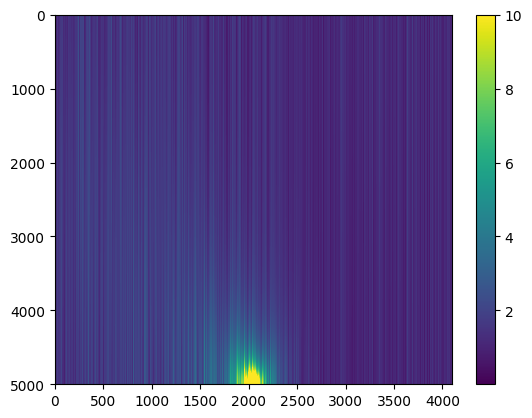

In [84]:
errft=yfakeft-yrealft
plt.imshow(np.abs(errft/matft),aspect='auto',vmax=10)
plt.colorbar()

In [87]:
xx=x[:-3,:].copy()

In [88]:
recons_err_fake=np.ravel(xre_fake)-np.ravel(xx)

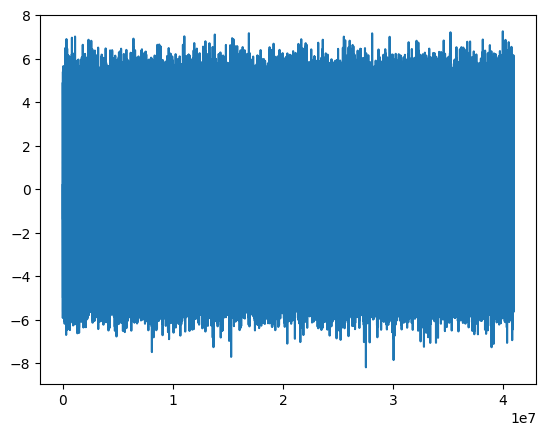

In [89]:
plt.plot(recons_err_fake)

In [90]:
recons_err_real=np.ravel(xre_real)-np.ravel(xx)

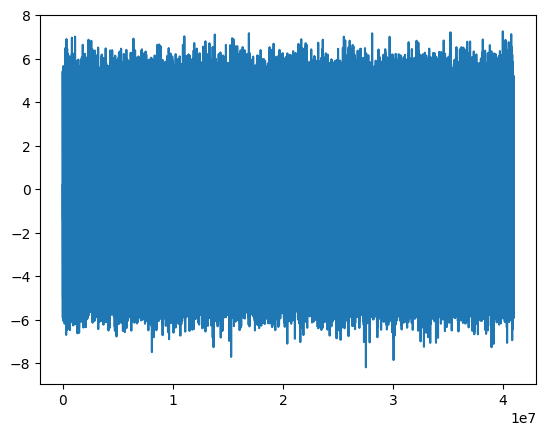

In [91]:
plt.plot(recons_err_real)